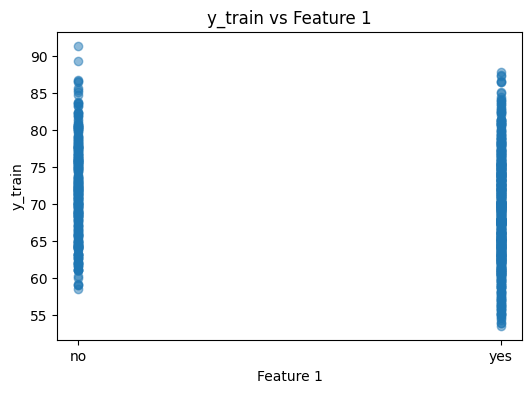

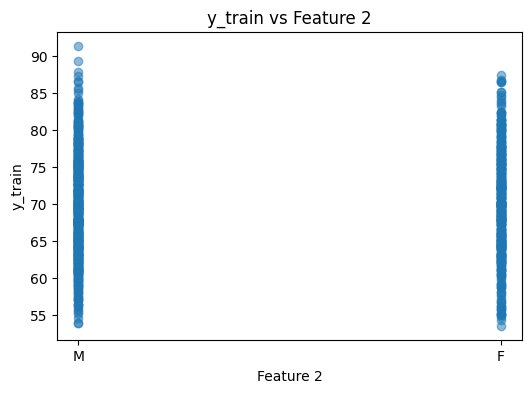

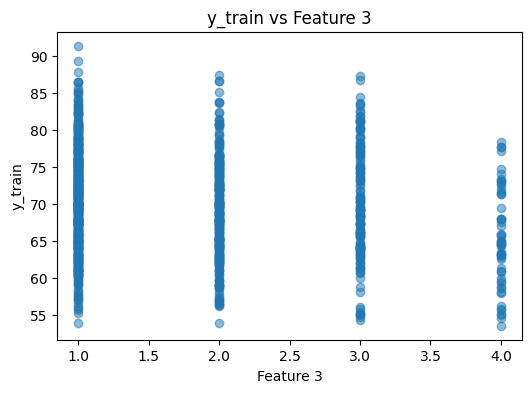

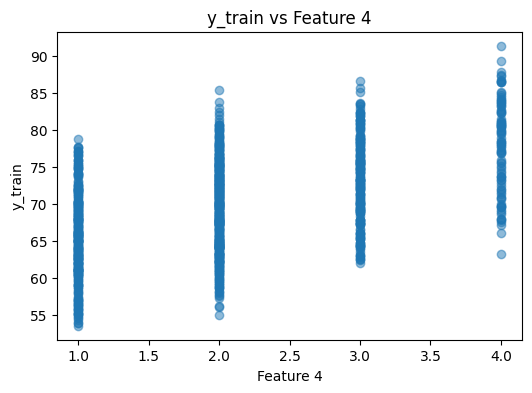

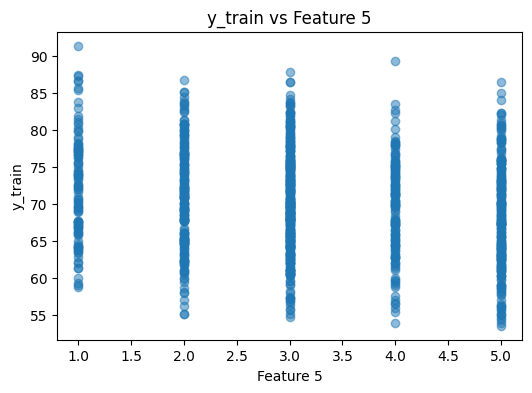

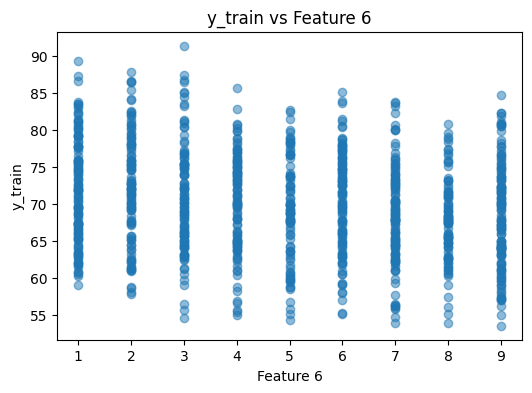

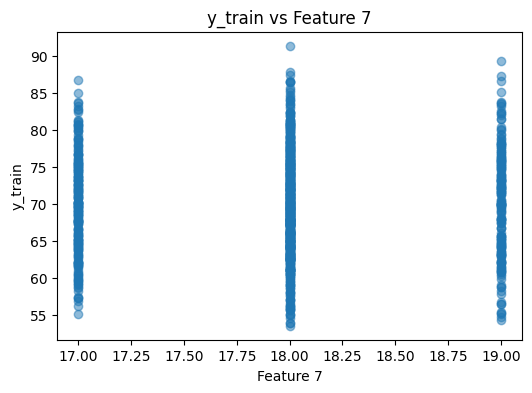

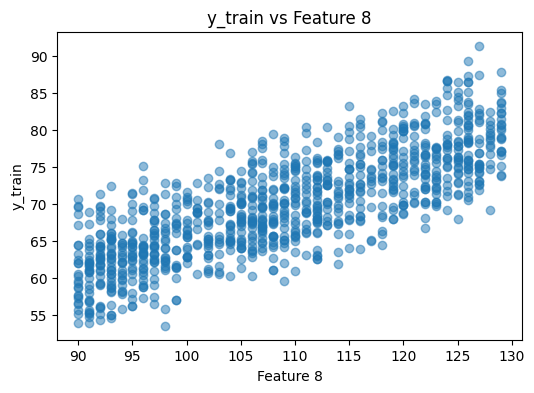

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder

# Load the data
data = pd.read_excel('Training data.xlsx')

# Extract features and target variable
x_train = np.array(data.iloc[:, 0:8])
y_train = np.array(data.iloc[:, 8]).reshape(-1, 1)

# Plot y_train against each feature in x_train for visualization
num_features = x_train.shape[1]

for i in range(num_features):
    plt.figure(figsize=(6, 4))
    plt.scatter(x_train[:, i], y_train, alpha=0.5)
    plt.title(f'y_train vs Feature {i+1}')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('y_train')
    plt.show()

# Function to perform label encoding for categorical features
def label_encode_features(data):
    label_encoders = {}
    for column in data.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le
    return data, label_encoders

# Apply label encoding to the original data
data, label_encoders = label_encode_features(data)

# Extract features and target variable after encoding
x_train = np.array(data.iloc[:, 0:8])
y_train = np.array(data.iloc[:, 8]).reshape(-1, 1)

# Function to add polynomial features
def feature_changing(x_train):
    poly = PolynomialFeatures(degree=2, include_bias=False)
    x_train_poly = poly.fit_transform(x_train)
    return x_train_poly

# Apply feature transformation after encoding
x_train = feature_changing(x_train)


In [19]:
def z_score(x_train):
    # Calculate mean and standard deviation
    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)

    # Apply z-score normalization
    x_train_scaled = (x_train - x_mean) / x_std

    return x_train_scaled, x_std, x_mean


In [20]:
def cost(x_train, y_train, w, b):
    # Number of training examples
    m = len(y_train)

    # Predicted values
    y_pred = np.dot(x_train, w) + b

    # Mean squared error
    loss = np.mean((y_pred - y_train) ** 2)

    return loss


In [21]:
def gradient_descent(x_train, y_train, w, b, learning_rate=0.01):
    # Number of training examples
    m = len(y_train)

    # Predicted values
    y_pred = np.dot(x_train, w) + b

    # Compute gradients
    dw = (1/m) * np.dot(x_train.T, (y_pred - y_train))
    db = (1/m) * np.sum(y_pred - y_train)

    # Update parameters
    w = w - learning_rate * dw
    b = b - learning_rate * db

    return w, b


In [30]:
def label_encode_features(data):
    label_encoders = {}
    for column in data.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le
    return data, label_encoders

def feature_changing(x_train):
    poly = PolynomialFeatures(degree=2, include_bias=False)
    x_train_poly = poly.fit_transform(x_train)
    return x_train_poly, poly

# Load and encode training data
data = pd.read_excel('Training data.xlsx')
data, label_encoders = label_encode_features(data)

x_train = np.array(data.iloc[:, 0:8])
y_train = np.array(data.iloc[:, 8]).reshape(-1, 1)

# Standardize training data
x_train = x_train.astype(np.float64)
x_train, x_std, x_mean = z_score(x_train)

# Apply feature transformation
x_train, poly = feature_changing(x_train)

# Initialize weights and bias
np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1], 1)
b = np.random.randn(1)

# Print initial values
print("Initial cost:", cost(x_train, y_train, w, b))

# Train the model with learning rate tuning
learning_rate = 0.01
iterations = 10000  # Change this if necessary
old_cost = cost(x_train, y_train, w, b)
for i in range(iterations):
    w, b = gradient_descent(x_train, y_train, w, b, learning_rate)
    new_cost = cost(x_train, y_train, w, b)
    if i % 1000 == 0:
        print(f"Iteration {i}: Cost {new_cost}")
    if abs(old_cost - new_cost) < 0.00001:
        break
    old_cost = new_cost

# Load and encode test data
test_data = pd.read_excel('Test data.xlsx')
for column, le in label_encoders.items():
    test_data[column] = le.transform(test_data[column])

x_predict = test_data.iloc[:, :8].to_numpy()
x_predict = x_predict.astype(np.float64)

# Standardize test data using training mean and std
x_predict = (x_predict - x_mean) / x_std

# Apply feature transformation to test data
x_predict = poly.transform(x_predict)

ans = test_data.iloc[:, 8].to_numpy()

# Make predictions
y_predict = np.dot(x_predict, w) + b

# Print intermediate values
print("Predicted values:", y_predict[:5])
print("Actual values:", ans[:5])

# Calculate accuracy
accuracy = 0
for dim in range(len(ans)):
    if abs(y_predict[dim] - ans[dim]) < 0.5:  # Tolerance of +- 0.5
        accuracy += 1
accuracy = round(accuracy * 100 / len(ans), 2)
ok = 'Congratulations' if accuracy > 95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")


Initial cost: 5313.2916785533425
Iteration 0: Cost 4414.307410901385
Iteration 1000: Cost 2.907161790222537
Iteration 2000: Cost 0.031581180848928386
Predicted values: [[74.5354527 ]
 [65.235376  ]
 [79.18850292]
 [62.68085438]
 [67.77059565]]
Actual values: [74.59 65.28 79.24 62.66 67.83]
Congratulations, your accuracy is 100.0%
